# Kernel Density Estimation

### Motivating Kernel Density Estimation with Histograms

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def make_data(N, f = 0.3, rseed = 1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

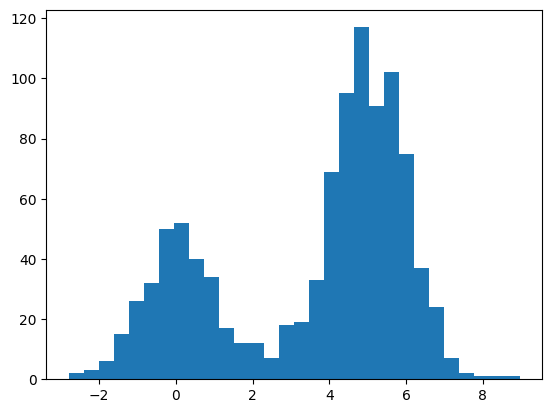

In [3]:
hist = plt.hist(x, bins = 30, density = False)

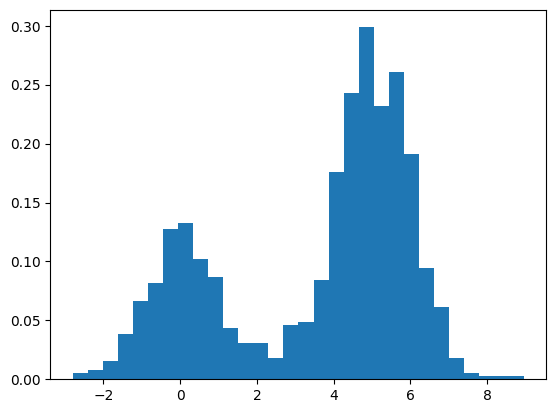

In [4]:
hist = plt.hist(x, bins = 30, density = True)

In [5]:
density, bins, patches = hist
widths = bins[1: ] - bins[ :-1]
(density * widths).sum()

1.0

In [6]:
density

array([0.00510565, 0.00765847, 0.01531695, 0.03829237, 0.06637345,
       0.08169039, 0.12764124, 0.13274689, 0.10211299, 0.08679604,
       0.04339802, 0.0306339 , 0.0306339 , 0.01786977, 0.04595085,
       0.04850367, 0.08424322, 0.17614491, 0.24251836, 0.2986805 ,
       0.23230706, 0.26038813, 0.19146186, 0.09445452, 0.0612678 ,
       0.01786977, 0.00510565, 0.00255282, 0.00255282, 0.00255282])

In [7]:
bins

array([-2.793085  , -2.40136208, -2.00963915, -1.61791623, -1.22619331,
       -0.83447038, -0.44274746, -0.05102454,  0.34069839,  0.73242131,
        1.12414423,  1.51586716,  1.90759008,  2.29931301,  2.69103593,
        3.08275885,  3.47448178,  3.8662047 ,  4.25792762,  4.64965055,
        5.04137347,  5.43309639,  5.82481932,  6.21654224,  6.60826516,
        6.99998809,  7.39171101,  7.78343393,  8.17515686,  8.56687978,
        8.9586027 ])

In [8]:
x = make_data(20)
bins = np.linspace(-5, 10, 10)

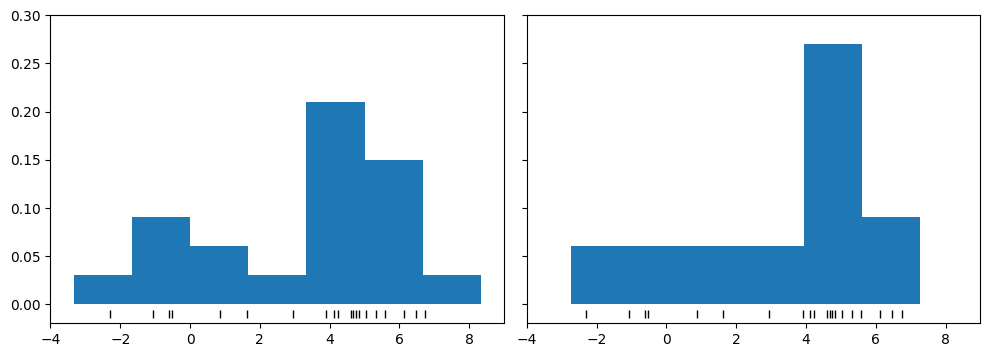

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4),
                       sharex = True, sharey = True,
                       subplot_kw={'xlim':(-4, 9),
                                   'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace = 0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins = bins + offset, density = True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k', markeredgewidth = 1)

(-0.2, 8.0)

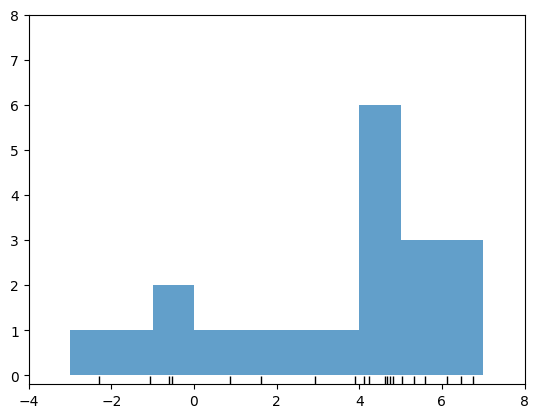

In [10]:
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth = 1)
for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1, alpha = 0.7))
ax.set_xlim(-4, 8)
ax.set_ylim(-0.2, 8)

(-0.2, 8.0)

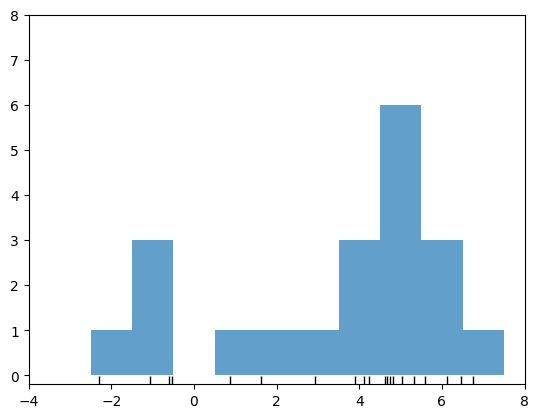

In [11]:
fig, ax = plt.subplots()
bins = np.arange(-2.5, 10)
ax.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth = 1)
for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1, alpha = 0.7))
ax.set_xlim(-4, 8)
ax.set_ylim(-0.2, 8)

(-4.0, 8.0, -0.2, 8.0)

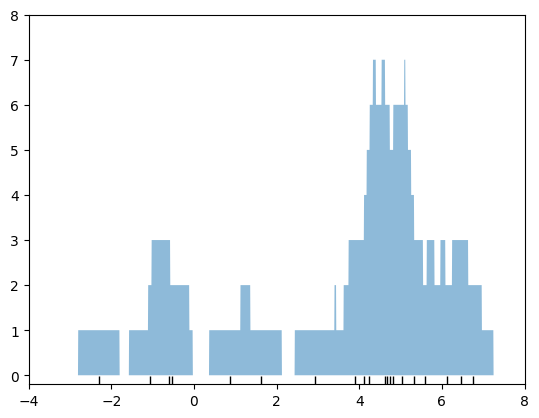

In [12]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)

plt.fill_between(x_d, density, alpha = 0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth = 1)
plt.axis([-4, 8, -0.2, 8])

(-4.0, 8.0, -0.2, 5.0)

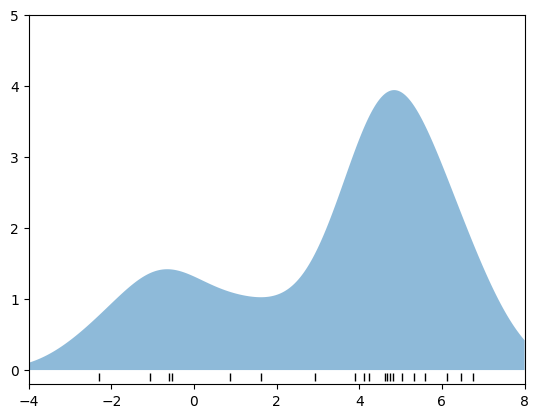

In [13]:
from scipy.stats import norm

x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth = 1)
plt.axis([-4, 8, -0.2, 5])

### Kernel Density Estimation in Practice


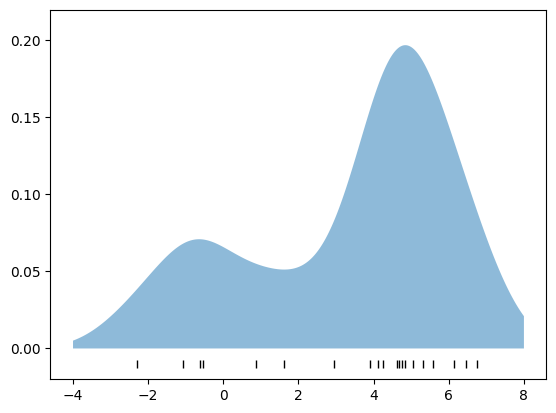

In [14]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(bandwidth = 1.0, kernel = 'gaussian')
kde.fit(x[:, None])
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha = 0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth = 1)
plt.ylim(-0.02, 0.22)
plt.show()

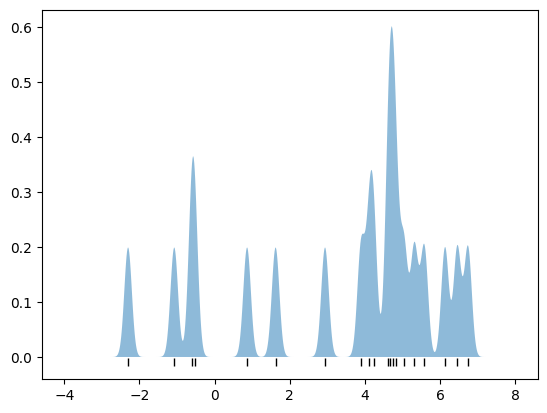

In [15]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(bandwidth = 0.1, kernel = 'gaussian')
kde.fit(x[:, None])
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha = 0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth = 1)
plt.show()

### Selecting the Bandwidth via Cross-validation

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

bandwidths = 10 ** np.linspace(-1, 1, 100)
print(bandwidths)

[ 0.1         0.10476158  0.10974988  0.1149757   0.12045035  0.12618569
  0.13219411  0.13848864  0.14508288  0.15199111  0.15922828  0.16681005
  0.17475284  0.18307383  0.19179103  0.2009233   0.21049041  0.22051307
  0.23101297  0.24201283  0.25353645  0.26560878  0.27825594  0.29150531
  0.30538555  0.31992671  0.33516027  0.35111917  0.36783798  0.38535286
  0.40370173  0.42292429  0.44306215  0.46415888  0.48626016  0.5094138
  0.53366992  0.55908102  0.58570208  0.61359073  0.64280731  0.67341507
  0.70548023  0.7390722   0.77426368  0.81113083  0.84975344  0.89021509
  0.93260335  0.97700996  1.02353102  1.07226722  1.12332403  1.17681195
  1.23284674  1.29154967  1.35304777  1.41747416  1.48496826  1.55567614
  1.62975083  1.70735265  1.78864953  1.87381742  1.96304065  2.05651231
  2.15443469  2.25701972  2.36448941  2.47707636  2.59502421  2.71858824
  2.84803587  2.98364724  3.12571585  3.27454916  3.43046929  3.59381366
  3.76493581  3.94420606  4.1320124   4.32876128  4.

In [17]:
grid = GridSearchCV(estimator = KernelDensity(kernel = 'gaussian'),
                    param_grid = {'bandwidth': bandwidths},
                    cv = LeaveOneOut())
grid.fit(x[:, None])
grid.best_params_

{'bandwidth': 1.1233240329780276}

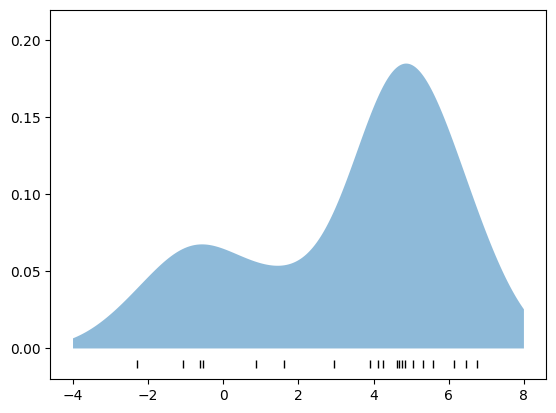

In [18]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(bandwidth = grid.best_params_['bandwidth'], kernel = 'gaussian')
kde.fit(x[:, None])
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha = 0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth = 1)
plt.ylim(-0.02, 0.22)
plt.show()